In [1]:
import networkx as nx
from tools import tools
from protocols import sequential, sequential_regrets, yankee_swap
from protocols.tools import sequential_tools, yankee_tools

# Enchères séquentielles sans et avec regret, _Yankee Swap_

Création et récupération des agents, du graphe, de la position des agents sur le graphe, et les sommets libres

In [2]:
number_of_gifts = 13
gifts = [i for i in range(number_of_gifts)]
agents, sites, positions, free_sites, max_weight = tools.initializer(number_of_agents=3, vertices_number=number_of_gifts, max_weight=10)
utilities_y = tools.normalized_utilities(agents, number_of_gifts)
print('agents: ' + str(agents))

agents: [0, 1, 2]


In [3]:
print('sites: ' + str(sites.nodes()))

sites: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Placement des agents :

In [4]:
for agent in positions.keys():
    print(str(agent) + ': ' + str(positions[agent]))

0: [11]
1: [10]
2: [7]


Utilités normalisées des agents sur les cadeaux pour le protocole _Yankee Swap_

In [5]:
for agent in utilities_y.keys():
    print(str(agent) + ': ' + str(utilities_y[agent]))

0: [5, 2, 4, 1, 11, 7, 12, 3, 9, 10, 8, 6, 0]
1: [1, 0, 9, 10, 2, 6, 3, 7, 12, 5, 8, 11, 4]
2: [11, 9, 2, 4, 1, 5, 3, 12, 10, 7, 8, 0, 6]


Affichage des arêtes du graphe :

{(0, 1): Text(0.058177,0.246293,'6'),
 (0, 2): Text(0.538091,0.485698,'10'),
 (0, 3): Text(0.731069,-0.0478795,'6'),
 (0, 4): Text(0.328628,0.518029,'7'),
 (0, 5): Text(0.48788,-0.154064,'8'),
 (0, 6): Text(0.160899,-0.117483,'4'),
 (0, 7): Text(0.459415,0.0571339,'4'),
 (0, 8): Text(0.540749,0.268706,'7'),
 (0, 9): Text(0.369975,-0.365065,'1'),
 (0, 10): Text(0.0319594,0.0395996,'2'),
 (0, 11): Text(0.118317,0.412695,'2'),
 (0, 12): Text(0.258177,0.14062,'3'),
 (1, 2): Text(-0.146156,0.462122,'10'),
 (1, 3): Text(0.0468216,-0.0714559,'3'),
 (1, 4): Text(-0.35562,0.494452,'2'),
 (1, 5): Text(-0.196368,-0.17764,'4'),
 (1, 6): Text(-0.523349,-0.141059,'8'),
 (1, 7): Text(-0.224833,0.0335575,'1'),
 (1, 8): Text(-0.143499,0.24513,'3'),
 (1, 9): Text(-0.314273,-0.388641,'2'),
 (1, 10): Text(-0.652288,0.0160231,'10'),
 (1, 11): Text(-0.565931,0.389118,'1'),
 (1, 12): Text(-0.426071,0.117044,'10'),
 (2, 3): Text(0.526736,0.167949,'3'),
 (2, 4): Text(0.124294,0.733857,'4'),
 (2, 5): Text(0.283

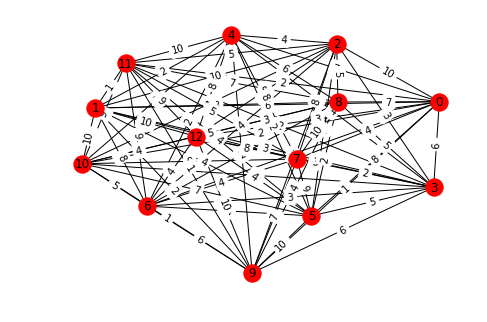

In [6]:
pos = pos=nx.spring_layout(sites)
nx.draw(sites, pos)
labels = nx.get_edge_attributes(sites, 'weight')
nx.draw_networkx_labels(sites, pos, edge_labels=labels)
nx.draw_networkx_edge_labels(sites, pos, edge_labels=labels)

Lancement des enchères :

In [7]:
allocations_1, tour_costs_1 = sequential.sequential_auctions(agents, sites, positions, free_sites, max_weight)
allocations_2, tour_costs_2 = sequential_regrets.sequential_auctions_with_regret(agents, sites, positions, free_sites, max_weight)
allocations_3 = yankee_swap.yankee_swap(agents, gifts, utilities_y)

Les protocoles d'enchères ne modifiant pas les données qui leurs sont confiées, il est aisé de comparer les résultats.<br>
Affichage des allocations :

In [8]:
print('Enchères séquentielles sans regret, allocations :')
for agent in allocations_1.keys():
    print(str(agent) + ': ' + str(allocations_1[agent]))

print('\nEnchères séquentielles avec regret, allocations :')
for agent in allocations_2.keys():
    print(str(agent) + ': ' + str(allocations_2[agent]))

print('\nYankee Swap, allocations :')
for agent in allocations_3.keys():
    print(str(agent) + ': ' + str(allocations_3[agent]))

Enchères séquentielles sans regret, allocations :
0: [11, 9, 0, 4, 6, 8, 5]
1: [10, 2]
2: [7, 1, 3, 12]

Enchères séquentielles avec regret, allocations :
0: [11, 0, 1, 3, 9]
1: [10, 2, 4, 12, 8, 5, 6]
2: [7]

Yankee Swap, allocations :
0: [0, 2, 3, 7, 12]
1: [1, 6, 8, 9]
2: [5, 4, 10, 11]


Affichage du coût des tournées :

In [9]:
print('Enchères séquentielles sans regret, coût des tournées :')
for agent in tour_costs_1.keys():
    tour = tour_costs_1[agent]
    print('agent ' + str(agent) + ', coût ' + str(sum(tour)) + ' (' + str(tour) + ')')

print('\nEnchères séquentielles avec regret, coût des tournées :')
for agent in tour_costs_2.keys():
    tour = tour_costs_2[agent]
    print('agent ' + str(agent) + ', coût ' + str(sum(tour)) + ' (' + str(tour) + ')')

touring_costs = yankee_tools.tour_cost(allocations_3)
print('\nYankee Swap, coût des tournées : ')
for agent in sorted(touring_costs.keys()):
    print('agent ' + str(agent) + ', coût ' + str(touring_costs[agent]))

Enchères séquentielles sans regret, coût des tournées :
agent 0, coût 9 ([0, 1, 1, 1, 2, 2, 2])
agent 1, coût 1 ([0, 1])
agent 2, coût 6 ([0, 1, 2, 3])

Enchères séquentielles avec regret, coût des tournées :
agent 0, coût 0 ([0, 0, 0, 0, 0])
agent 1, coût 16 ([0, 4, 4, 4, 2, 2])
agent 2, coût 4 ([0, 4])

Yankee Swap, coût des tournées : 
agent 0, coût 5
agent 1, coût 4
agent 2, coût 4


## Comparaison des protocoles

### Critère de comparaison : coût des tournées

In [10]:
tmp = []
for value in tour_costs_1.values():
    tmp.extend(value)
mean_tour_cost_1 = sum(tmp) / len(tour_costs_1.values())

tmp = []
for value in tour_costs_2.values():
    tmp.extend(value)
mean_tour_cost_2 = sum(tmp) / len(tour_costs_2.values())

mean_tour_cost_3 = sum(touring_costs.values()) / len(touring_costs.values())

print('Coût moyen d\'une tournée pour les enchères séquentielles sans regret : ' + str(mean_tour_cost_1))
print('Coût moyen d\'une tournée pour les enchères séquentielles avec regret : ' + str(mean_tour_cost_2))
print('Coût moyen d\'une tournée pour le Yanke Swap : ' + str(mean_tour_cost_3))

Coût moyen d'une tournée pour les enchères séquentielles sans regret : 5.333333333333333
Coût moyen d'une tournée pour les enchères séquentielles avec regret : 6.666666666666667
Coût moyen d'une tournée pour le Yanke Swap : 4.333333333333333


In [11]:
inf_1 = 'sans regret' if mean_tour_cost_1 < mean_tour_cost_2 else 'avec regret'
sup_1 = 'sans regret' if mean_tour_cost_1 > mean_tour_cost_2 else 'avec regret'
print('On peut donc remaquer que les tournées ' + inf_1.upper() + ' ont un coût moyen inférieur à celle ' + sup_1.upper())

inf_2 = 'sans regret' if mean_tour_cost_1 < mean_tour_cost_3 else 'Yankee Swap'
sup_2 = 'sans regret' if mean_tour_cost_1 > mean_tour_cost_3 else 'Yankee Swap'
print('On peut donc remaquer que les tournées ' + inf_2.upper() + ' ont un coût moyen inférieur à celle ' + sup_2.upper())

inf_3 = 'avec regret' if mean_tour_cost_2 < mean_tour_cost_3 else 'Yankee Swap'
sup_3 = 'avec regret' if mean_tour_cost_2 > mean_tour_cost_3 else 'Yankee Swap'
print('On peut donc remaquer que les tournées ' + inf_3.upper() + ' ont un coût moyen inférieur à celle ' + sup_3.upper())

On peut donc remaquer que les tournées SANS REGRET ont un coût moyen inférieur à celle AVEC REGRET
On peut donc remaquer que les tournées YANKEE SWAP ont un coût moyen inférieur à celle SANS REGRET
On peut donc remaquer que les tournées YANKEE SWAP ont un coût moyen inférieur à celle AVEC REGRET


### Critère de comparaison : proportionalité

In [12]:
pfs_1 = sequential_tools.proportional_fair_share(allocations_1, tour_costs_1, sites)
pfs_2 = sequential_tools.proportional_fair_share(allocations_2, tour_costs_2, sites)
pfs_3 = yankee_tools.proportional_fair_share(allocations_3, utilities_y)

print('\nProportional fair share w/o regrets: ')
for agent in sorted(pfs_1.keys()):
    share = pfs_1[agent]
    fairness = 'fair' if share[2] else 'unfair'
    utility = sum(tour_costs_1[agent])
    print('\tThe allocation for agent \'' + str(agent) + '\' with value ' + str(utility) + ' is ' + fairness + ' ' + str(share))

print('\nProportional fair share w/ regrets: ')
for agent in sorted(pfs_2.keys()):
    share = pfs_2[agent]
    fairness = 'fair' if share[2] else 'unfair'
    utility = sum(tour_costs_2[agent])
    print('\tThe allocation for agent \'' + str(agent) + '\' with value ' + str(utility) + ' is ' + fairness + ' ' + str(share))


print('\nProportional fair share Yankee Swap: ')
for agent in sorted(pfs_3.keys()):
    share = pfs_3[agent]
    fairness = 'fair' if share[2] else 'unfair'
    utility = yankee_tools.allocation_utility(allocations_3[agent], utilities_y[agent])
    print('\tThe allocation for agent \'' + str(agent) + '\' with value ' + str(utility) + ' is ' + fairness + ' ' + str(share))


Proportional fair share w/o regrets: 
	The allocation for agent '0' with value 9 is unfair (6.0, [11, 9, 0, 4, 6, 8, 5], False)
	The allocation for agent '1' with value 1 is fair (6.0, [10, 2], True)
	The allocation for agent '2' with value 6 is fair (6.0, [7, 1, 3, 12], True)

Proportional fair share w/ regrets: 
	The allocation for agent '0' with value 0 is fair (6.0, [11, 0, 1, 3, 9], True)
	The allocation for agent '1' with value 16 is unfair (6.0, [10, 2, 4, 12, 8, 5, 6], False)
	The allocation for agent '2' with value 4 is fair (6.0, [7], True)

Proportional fair share Yankee Swap: 
	The allocation for agent '0' with value 13 is fair (26.0, [0, 2, 3, 7, 12], True)
	The allocation for agent '1' with value 20 is fair (26.0, [1, 6, 8, 9], True)
	The allocation for agent '2' with value 14 is fair (26.0, [5, 4, 10, 11], True)


### Critère de comparaison : égalitarisme

In [13]:
eg_1 = True
for agent in sorted(pfs_1.keys()):
    share = pfs_1[agent]
    eg_1 = eg_1 and share[2]

eg_2 = True
for agent in sorted(pfs_2.keys()):
    share = pfs_2[agent]
    eg_2 = eg_2 and share[2]


eg_3 = True
for agent in sorted(pfs_3.keys()):
    share = pfs_3[agent]
    eg_3 = eg_3 and share[2]
    
is_or_not_1 = 'est' if eg_1 else 'n\'est pas'
is_or_not_2 = 'est' if eg_2 else 'n\'est pas'
is_or_not_3 = 'est' if eg_3 else 'n\'est pas'

In [14]:
print('L\'allocation pour le protocole séquentiel sans regret ' + is_or_not_1.upper() + ' égalitaire')
print('L\'allocation pour le protocole séquentiel avec regret ' + is_or_not_2.upper() + ' égalitaire')
print('L\'allocation pour le protocole Yankee Swap ' + is_or_not_3.upper() + ' égalitaire')

L'allocation pour le protocole séquentiel sans regret N'EST PAS égalitaire
L'allocation pour le protocole séquentiel avec regret N'EST PAS égalitaire
L'allocation pour le protocole Yankee Swap EST égalitaire


### Critère de comparaison : Envy-freeness

In [15]:
utilities_s = sequential_tools.extract_utility_from_graph(sites)
envy_1 = sequential_tools.envy_freeness(allocations_1, tour_costs_1, utilities_s)
envy_2 = sequential_tools.envy_freeness(allocations_2, tour_costs_2, utilities_s)
envy_3 = yankee_tools.envy_freeness(allocations_3, utilities_y)

In [16]:
if envy_1:
    print('\nThe allocation is not envy-free for the seqeuntial auctions w/o regrets protocol:')
    for agent in sorted(envy_1.keys()):
        score = sum(tour_costs_1[agent])
        print('\tagent ' + str(agent) + ', score: ' + str(score))
        print('\tagent ' + str(agent) + ' is envious of (agent, allocation, score): ' + str(envy_1[agent]))
else:
    print('\nThe allocation is envy-free for the seqeuntial auctions w/o regrets protocol')


The allocation is not envy-free for the seqeuntial auctions w/o regrets protocol:
	agent 0, score: 9
	agent 0 is envious of (agent, allocation, score): [(0, [10, 2], 1), (0, [7, 1, 3, 12], 6)]
	agent 2, score: 6
	agent 2 is envious of (agent, allocation, score): [(2, [10, 2], 1)]


In [17]:
if envy_2:
    print('\nThe allocation is not envy-free for the seqeuntial auctions w/ regrets protocol:')
    for agent in sorted(envy_2.keys()):
        score = sum(tour_costs_2[agent])
        print('\tagent ' + str(agent) + ', score: ' + str(score))
        print('\tagent ' + str(agent) + ' is envious of (agent, allocation, score): ' + str(envy_2[agent]))
else:
    print('\nThe allocation is envy-free for the seqeuntial auctions w/ regrets protocol')


The allocation is not envy-free for the seqeuntial auctions w/ regrets protocol:
	agent 1, score: 16
	agent 1 is envious of (agent, allocation, score): [(1, [11, 0, 1, 3, 9], 5), (1, [7], 0)]


In [18]:
if envy_3:
    print('\nThe allocation is not envy-free for the Yankee Swap protocol:')
    for agent in sorted(envy_3.keys()):
        score = yankee_tools.allocation_utility(allocations_3[agent], utilities_y[agent])
        print('\tagent ' + str(agent) + ', score: ' + str(score))
        print('\tagent ' + str(agent) + ' is envious of (agent, allocation, score): ' + str(envy_3[agent]))
else:
    print('\nThe allocation is envy-free for the Yankee Swap protocol')


The allocation is envy-free for the Yankee Swap protocol
